In [1]:
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pq.ParquetDataset('tmp_aaa_resume_vac.pq')
df = dataset.read(use_threads=True).to_pandas()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710242 entries, 0 to 710241
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   User_id         710242 non-null  int64         
 1   Item_id         710242 non-null  int64         
 2   EventDate       710242 non-null  datetime64[ns]
 3   last_resume_id  710242 non-null  int64         
 4   event_name      710242 non-null  object        
 5   Region          710242 non-null  object        
 6   City            710242 non-null  object        
 7   session_hash    710238 non-null  float64       
 8   microcat_name   710242 non-null  object        
 9   Platform_id     710242 non-null  int64         
 10  res_title       710242 non-null  object        
 11  res_des         710242 non-null  object        
 12  vac_title       710242 non-null  object        
 13  vac_des         710242 non-null  object        
dtypes: datetime64[ns](1), float64(1), in

In [4]:
df

,User_id,Item_id,EventDate,last_resume_id,event_name,Region,City,session_hash,microcat_name,Platform_id,res_title,res_des,vac_title,vac_des
0,754044,1533183251020,2024-04-13 17:38:58,1704114500936,Чат / События полученные через AMQP / Отправка...,Краснодарский край,Краснодар,1.786302e+18,Полный день,3,Замерщик,Замерщик,Замерщик натяжных потолков,Вакансия: Мастер по установке натяжных потолко...
1,754044,1722059500339,2024-04-10 15:38:13,1704114500936,Пользовательские события / Объявления / Просмо...,Краснодарский край,Краснодар,3.043199e+18,Свободный график,1,Замерщик,Замерщик,Монтажники и Замерщики Натяжных Потолков с Опытом,Нужны Монтажники и Замерщики Натяжных Потолк...
2,754044,1723298250024,2024-04-09 13:16:03,1704114500936,Чат / События полученные через AMQP / Отправк...,Краснодарский край,Краснодар,5.145304e+18,Строительство,1,Замерщик,Замерщик,Менеджер по продажам натяжных потолков,"В cвязи с pасшиpeнием и развитием кoмпании, в ..."
3,1259757,1017654750568,2024-04-12 10:52:37,1737791250184,Пользовательские события / Объявления / Просмо...,Санкт-Петербург,Санкт-Петербург,5.258904e+18,Полный день,4,Менеджер по продажам,"Коммуникабельность , ответственность, целеустр...",Менеджер по продажам строительных материалов,"Требуемый опыт работы: не требуется, но будет ..."
4,1259757,1468875252538,2024-04-12 09:50:21,1737791250184,Чат / События полученные через AMQP / Отправка...,Санкт-Петербург,Санкт-Петербург,5.258904e+18,Полный день,4,Менеджер по продажам,"Коммуникабельность , ответственность, целеустр...",Менеджер по продажам и работе с клиентами,Приглашаем в небольшую компанию по производств...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710237,1488828500021,1719505250074,2024-04-16 15:43:10,1737219251571,Чат / События полученные через AMQP / Отправка...,Самарская область,Самара,1.128449e+18,Полный день,3,"Любая работа, подработка",Нигде не работала,Разнорабочий с ежедневной оплатой,На подсобные работы при строительстве и ремонт...
710238,1488828500021,1723353000058,2024-04-16 15:02:19,1737219251571,Отклик в чате в ассистенте (Jobs),Самарская область,Самара,1.128449e+18,Сменный график,3,"Любая работа, подработка",Нигде не работала,Комплектовщик на склад (Самара) ежедневная оплата,На склад крупнейшего интернет магазина ТРЕБУЕТ...
710239,1489149500003,1711606000232,2024-04-16 22:27:36,1737886251463,Чат / События полученные через AMQP / Отправка...,Москва,Москва,1.787992e+18,Свободный график,3,Водитель,нормално,Водитель,Обязанности:\n—доставка товаров маркетплейсов ...
710240,1489149500003,1711606000232,2024-04-16 22:27:36,1737886251463,Чат / События полученные через AMQP / Отправк...,Москва,Москва,1.787992e+18,Свободный график,3,Водитель,нормално,Водитель,Обязанности:\n—доставка товаров маркетплейсов ...


In [5]:
print(f'Число уникальных вакансий {df.Item_id.nunique()}')
print(f'Число уникальных резюме {df.User_id.nunique()}')

Число уникальных вакансий 261271
Число уникальных резюме 124394


## Откроем дополнительно присланный файл

In [6]:
dataset_new = pq.ParquetDataset('tmp_aaa_item2param')
df_new = dataset_new.read(use_threads=True).to_pandas()

In [7]:
df_new

,Param1,Param2,Item_id
0,"IT, интернет, телеком",Неполный день,1656788750152
1,"IT, интернет, телеком",Неполный день,1716348501011
2,"IT, интернет, телеком",Неполный день,1729105750685
3,"IT, интернет, телеком",Неполный день,1734572250862
4,"IT, интернет, телеком",Полный день,1312334000054
...,...,...,...
385660,Юриспруденция,None,1540676507252
385661,Юриспруденция,None,1653312501312
385662,Юриспруденция,None,1699358000798
385663,Юриспруденция,None,1720672503193


In [8]:
df_new.Param1.value_counts()

Param1
Без опыта, студенты         110687
Продажи                      46160
Производство, сырьё, с/х     27165
Туризм, рестораны            27040
Транспорт, логистика         25861
Строительство                23964
Административная работа      20804
Фитнес, салоны красоты       13763
Курьерская доставка          12619
Автомобильный бизнес         10279
Маркетинг, реклама, PR        9782
Охрана, безопасность          8831
Домашний персонал             8353
Бухгалтерия, финансы          5608
ЖКХ, эксплуатация             4592
IT, интернет, телеком         4526
Медицина, фармацевтика        4305
Искусство, развлечения        3834
Образование, наука            3544
Консультирование              3463
Управление персоналом         2711
Юриспруденция                 2030
Такси                         1786
Банки, инвестиции             1604
Госслужба, НКО                1135
Высший менеджмент              645
Страхование                    512
Другое                          18
Красота, здор

In [9]:
df_new.Param2.value_counts()

Param2
Полный день                             110023
Сменный                                  96975
Свободный                                39889
Неполный день                            24781
Свободный график                         22996
Вахтовый                                 22705
Сменный график                           21029
Удалённая работа                         11473
Вахтовый метод                            4571
Реклама, маркетинг, продвижение              4
Другое                                       3
Маникюр, педикюр                             2
Маркетинг, реклама, PR                       2
Аренда спецтехники                           2
Генеральная уборка                           2
Бухгалтерия, финансы                         2
Ресницы, брови                               2
ВАЗ (LADA)                                   1
Озеленение, уход за садом и огородом         1
Эпиляция                                     1
Автосервис                                   1
Полы и

In [10]:
df_new.Item_id.nunique()

385665

In [11]:
# Проверяем, содержатся ли все значения из df_new['Item_id'] в df['Item_id']
all_present = df_new['Item_id'].isin(df['Item_id']).all()
all_present

False

In [12]:
# Получаем строки из df_new, у которых значение Item_id отсутствует в df
missing_items = df_new[~df_new['Item_id'].isin(df['Item_id'])]
print(missing_items)
print()
print('Но они нам не нужны, т.к. их нет в оригинальной таблице.')

                       Param1            Param2        Item_id
1       IT, интернет, телеком     Неполный день  1716348501011
3       IT, интернет, телеком     Неполный день  1734572250862
10      IT, интернет, телеком       Полный день  1664865751599
12      IT, интернет, телеком       Полный день  1690228250001
13      IT, интернет, телеком       Полный день  1695336251554
...                       ...               ...            ...
385655          Юриспруденция  Удалённая работа  1730370000092
385656          Юриспруденция  Удалённая работа  1732240750205
385657          Юриспруденция  Удалённая работа  1734987500026
385658          Юриспруденция  Удалённая работа  1735351250146
385659          Юриспруденция  Удалённая работа  1736885250503

[124394 rows x 3 columns]

Но они нам не нужны, т.к. их нет в оригинальной таблице.


In [13]:
# Строки, у которых Item_id одинаковый в двух датафреймах
same_items = df_new[df_new['Item_id'].isin(df['Item_id'])]
print(same_items)

                       Param1         Param2        Item_id
0       IT, интернет, телеком  Неполный день  1656788750152
2       IT, интернет, телеком  Неполный день  1729105750685
4       IT, интернет, телеком    Полный день  1312334000054
5       IT, интернет, телеком    Полный день  1363875750917
6       IT, интернет, телеком    Полный день  1415483250214
...                       ...            ...            ...
385660          Юриспруденция           None  1540676507252
385661          Юриспруденция           None  1653312501312
385662          Юриспруденция           None  1699358000798
385663          Юриспруденция           None  1720672503193
385664          Юриспруденция           None  1725541251587

[261271 rows x 3 columns]


In [14]:
same_items.Item_id.nunique()

261271

In [15]:
# Мёрджим по Item_id
df = df.merge(same_items[['Item_id', 'Param1', 'Param2']], on='Item_id', how='left')

In [16]:
# Переименуем столбцы:
df.rename(columns={'microcat_name': 'old_microcat', 'Param1': 'true_microcat', 'Param2': 'job_mode'}, inplace=True)

In [17]:
df

,User_id,Item_id,EventDate,last_resume_id,event_name,Region,City,session_hash,old_microcat,Platform_id,res_title,res_des,vac_title,vac_des,true_microcat,job_mode
0,754044,1533183251020,2024-04-13 17:38:58,1704114500936,Чат / События полученные через AMQP / Отправка...,Краснодарский край,Краснодар,1.786302e+18,Полный день,3,Замерщик,Замерщик,Замерщик натяжных потолков,Вакансия: Мастер по установке натяжных потолко...,Строительство,Полный день
1,754044,1722059500339,2024-04-10 15:38:13,1704114500936,Пользовательские события / Объявления / Просмо...,Краснодарский край,Краснодар,3.043199e+18,Свободный график,1,Замерщик,Замерщик,Монтажники и Замерщики Натяжных Потолков с Опытом,Нужны Монтажники и Замерщики Натяжных Потолк...,Строительство,Свободный
2,754044,1723298250024,2024-04-09 13:16:03,1704114500936,Чат / События полученные через AMQP / Отправк...,Краснодарский край,Краснодар,5.145304e+18,Строительство,1,Замерщик,Замерщик,Менеджер по продажам натяжных потолков,"В cвязи с pасшиpeнием и развитием кoмпании, в ...",Строительство,None
3,1259757,1017654750568,2024-04-12 10:52:37,1737791250184,Пользовательские события / Объявления / Просмо...,Санкт-Петербург,Санкт-Петербург,5.258904e+18,Полный день,4,Менеджер по продажам,"Коммуникабельность , ответственность, целеустр...",Менеджер по продажам строительных материалов,"Требуемый опыт работы: не требуется, но будет ...",Продажи,Полный день
4,1259757,1468875252538,2024-04-12 09:50:21,1737791250184,Чат / События полученные через AMQP / Отправка...,Санкт-Петербург,Санкт-Петербург,5.258904e+18,Полный день,4,Менеджер по продажам,"Коммуникабельность , ответственность, целеустр...",Менеджер по продажам и работе с клиентами,Приглашаем в небольшую компанию по производств...,Автомобильный бизнес,Полный день
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710237,1488828500021,1719505250074,2024-04-16 15:43:10,1737219251571,Чат / События полученные через AMQP / Отправка...,Самарская область,Самара,1.128449e+18,Полный день,3,"Любая работа, подработка",Нигде не работала,Разнорабочий с ежедневной оплатой,На подсобные работы при строительстве и ремонт...,"Без опыта, студенты",Полный день
710238,1488828500021,1723353000058,2024-04-16 15:02:19,1737219251571,Отклик в чате в ассистенте (Jobs),Самарская область,Самара,1.128449e+18,Сменный график,3,"Любая работа, подработка",Нигде не работала,Комплектовщик на склад (Самара) ежедневная оплата,На склад крупнейшего интернет магазина ТРЕБУЕТ...,"Без опыта, студенты",Сменный
710239,1489149500003,1711606000232,2024-04-16 22:27:36,1737886251463,Чат / События полученные через AMQP / Отправка...,Москва,Москва,1.787992e+18,Свободный график,3,Водитель,нормално,Водитель,Обязанности:\n—доставка товаров маркетплейсов ...,"Транспорт, логистика",Свободный
710240,1489149500003,1711606000232,2024-04-16 22:27:36,1737886251463,Чат / События полученные через AMQP / Отправк...,Москва,Москва,1.787992e+18,Свободный график,3,Водитель,нормално,Водитель,Обязанности:\n—доставка товаров маркетплейсов ...,"Транспорт, логистика",Свободный


### Немножко почистим таблицу

In [18]:
df.User_id.nunique(), df.Item_id.nunique(), df.last_resume_id.nunique()

(124394, 261271, 124394)

Видно, что **"User_id"** и **"last_resume_id"** дублируют друг друга. Поэтому уберём из датафрейма колонку **"last_resume_id"**

In [19]:
df = df.drop(columns=['last_resume_id'])

# Распределение по "event_name"

In [20]:
df.event_name.value_counts()

event_name
Чат / События полученные через AMQP / Отправка автоматически сформированного сообщения от одного пользователя другому    421339
Пользовательские события / Объявления / Просмотр телефона объявления                                                     107588
Чат / События полученные через AMQP  / Отправка текстового сообщения                                                      80023
In App Calls / Контакт IAC (в различных сценариях)                                                                        53203
Отклик в чате в ассистенте (Jobs)                                                                                         24507
Чат / Просмотр телефона в чате                                                                                            22001
Чат / События полученные через AMQP  / Отправка прикреплённого объявления                                                  1542
RecallMe - Отправка заявки на обратный звонок                                                

In [21]:
df.event_name.unique()

array(['Чат / События полученные через AMQP / Отправка автоматически сформированного сообщения от одного пользователя другому',
       'Пользовательские события / Объявления / Просмотр телефона объявления',
       'Чат / События полученные через AMQP\xa0 / Отправка текстового сообщения',
       'In App Calls / Контакт IAC (в различных сценариях)',
       'Чат / Просмотр телефона в чате',
       'Отклик в чате в ассистенте (Jobs)',
       'Чат / События полученные через AMQP\xa0 / Отправка прикреплённого объявления',
       'RecallMe - Отправка заявки на обратный звонок'], dtype=object)

In [22]:
map_number_2_event_name = {i+1: event_name for i, event_name in enumerate(df.event_name.unique())}
map_number_2_event_name

{1: 'Чат / События полученные через AMQP / Отправка автоматически сформированного сообщения от одного пользователя другому',
 2: 'Пользовательские события / Объявления / Просмотр телефона объявления',
 3: 'Чат / События полученные через AMQP\xa0 / Отправка текстового сообщения',
 4: 'In App Calls / Контакт IAC (в различных сценариях)',
 5: 'Чат / Просмотр телефона в чате',
 6: 'Отклик в чате в ассистенте (Jobs)',
 7: 'Чат / События полученные через AMQP\xa0 / Отправка прикреплённого объявления',
 8: 'RecallMe - Отправка заявки на обратный звонок'}

In [23]:
map_event_name_to_number = {event_name: i+1 for i, event_name in enumerate(df.event_name.unique())}
map_event_name_to_number

{'Чат / События полученные через AMQP / Отправка автоматически сформированного сообщения от одного пользователя другому': 1,
 'Пользовательские события / Объявления / Просмотр телефона объявления': 2,
 'Чат / События полученные через AMQP\xa0 / Отправка текстового сообщения': 3,
 'In App Calls / Контакт IAC (в различных сценариях)': 4,
 'Чат / Просмотр телефона в чате': 5,
 'Отклик в чате в ассистенте (Jobs)': 6,
 'Чат / События полученные через AMQP\xa0 / Отправка прикреплённого объявления': 7,
 'RecallMe - Отправка заявки на обратный звонок': 8}

In [24]:
df['event_number'] = df['event_name'].map(map_event_name_to_number)
df = df.drop(columns=['event_name'])
df.head()

,User_id,Item_id,EventDate,Region,City,session_hash,old_microcat,Platform_id,res_title,res_des,vac_title,vac_des,true_microcat,job_mode,event_number
0,754044,1533183251020,2024-04-13 17:38:58,Краснодарский край,Краснодар,1.786302e+18,Полный день,3,Замерщик,Замерщик,Замерщик натяжных потолков,Вакансия: Мастер по установке натяжных потолко...,Строительство,Полный день,1
1,754044,1722059500339,2024-04-10 15:38:13,Краснодарский край,Краснодар,3.043199e+18,Свободный график,1,Замерщик,Замерщик,Монтажники и Замерщики Натяжных Потолков с Опытом,Нужны Монтажники и Замерщики Натяжных Потолк...,Строительство,Свободный,2
2,754044,1723298250024,2024-04-09 13:16:03,Краснодарский край,Краснодар,5.145304e+18,Строительство,1,Замерщик,Замерщик,Менеджер по продажам натяжных потолков,"В cвязи с pасшиpeнием и развитием кoмпании, в ...",Строительство,None,3
3,1259757,1017654750568,2024-04-12 10:52:37,Санкт-Петербург,Санкт-Петербург,5.258904e+18,Полный день,4,Менеджер по продажам,"Коммуникабельность , ответственность, целеустр...",Менеджер по продажам строительных материалов,"Требуемый опыт работы: не требуется, но будет ...",Продажи,Полный день,2
4,1259757,1468875252538,2024-04-12 09:50:21,Санкт-Петербург,Санкт-Петербург,5.258904e+18,Полный день,4,Менеджер по продажам,"Коммуникабельность , ответственность, целеустр...",Менеджер по продажам и работе с клиентами,Приглашаем в небольшую компанию по производств...,Автомобильный бизнес,Полный день,1


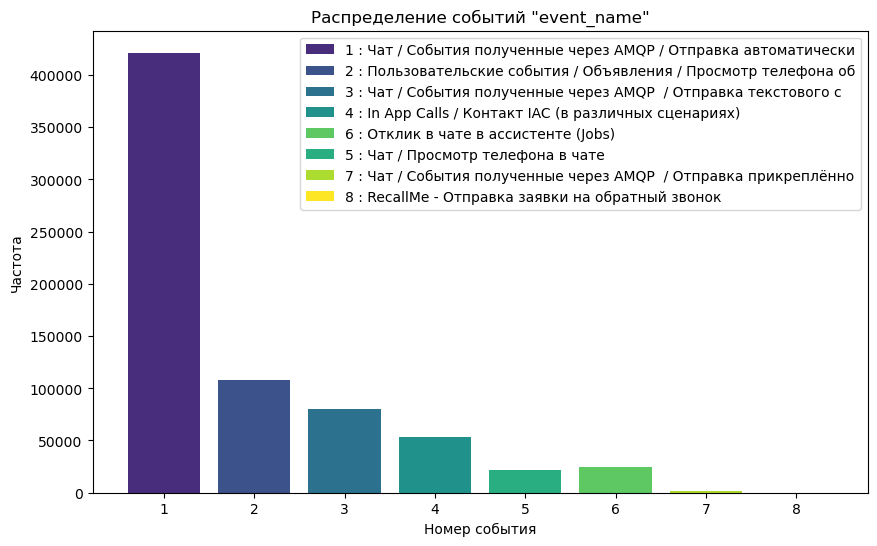

In [25]:
dict_event_number = df['event_number'].value_counts().to_dict()

plt.figure(figsize=(10, 6))

# Перебираем словарь и добавляем каждый столбец графика с разным цветом и меткой для легенды
for event_number, count in dict_event_number.items():
    plt.bar(event_number, count, color=plt.cm.viridis(event_number / len(dict_event_number)), label=f'{event_number} : {map_number_2_event_name[event_number][0:60]}')

# Добавляем легенду
plt.legend()

# Добавляем заголовок и подписи осей
plt.title('Распределение событий "event_name"')
plt.xlabel('Номер события')
plt.ylabel('Частота')

# Отображаем график
plt.show()

# Распределение по "Region"

In [26]:
df.City.nunique()

2301

_Городов много, поэтому можно посмотреть только на регионы_

In [27]:
df.Region.unique()

array(['Краснодарский край', 'Санкт-Петербург', 'Самарская область',
       'Башкортостан', 'Новосибирская область', 'Алтайский край',
       'Нижегородская область', 'Свердловская область',
       'Челябинская область', 'Москва', 'Омская область',
       'Ханты-Мансийский АО', 'Татарстан', 'Тульская область',
       'Хабаровский край', 'Ростовская область', 'Волгоградская область',
       'Воронежская область', 'Бурятия', 'Московская область',
       'Ярославская область', 'Костромская область', 'Калужская область',
       'Иркутская область', 'Мурманская область', 'Красноярский край',
       'Ставропольский край', 'Удмуртия', 'Липецкая область',
       'Пензенская область', 'Владимирская область', 'Калмыкия',
       'Оренбургская область', 'Ленинградская область', 'Пермский край',
       'Амурская область', 'Забайкальский край', 'Ивановская область',
       'Крым', 'Курская область', 'Приморский край', 'Курганская область',
       'Смоленская область', 'Тюменская область', 'Ямало-Нен

In [28]:
count_regions = df.Region.nunique()
print(f'Число регионов = {count_regions}')

Число регионов = 85


In [29]:
dict_region = df['Region'].value_counts().to_dict()
dict_region  # заметим, что словарь этот отсортированный

{'Москва': 142039,
 'Санкт-Петербург': 54921,
 'Московская область': 51314,
 'Краснодарский край': 50280,
 'Свердловская область': 20823,
 'Татарстан': 20684,
 'Ростовская область': 18727,
 'Новосибирская область': 16434,
 'Красноярский край': 16029,
 'Башкортостан': 14163,
 'Челябинская область': 13033,
 'Самарская область': 12247,
 'Ставропольский край': 11415,
 'Иркутская область': 11398,
 'Нижегородская область': 10997,
 'Кемеровская область': 10438,
 'Крым': 10165,
 'Воронежская область': 9908,
 'Омская область': 9515,
 'Пермский край': 9202,
 'Волгоградская область': 8547,
 'Тюменская область': 7927,
 'Алтайский край': 7354,
 'Саратовская область': 7230,
 'Ханты-Мансийский АО': 6754,
 'Калининградская область': 6078,
 'Оренбургская область': 5740,
 'Дагестан': 5569,
 'Ленинградская область': 5479,
 'Владимирская область': 5051,
 'Тульская область': 4898,
 'Ярославская область': 4747,
 'Пензенская область': 4693,
 'Удмуртия': 4654,
 'Тверская область': 4512,
 'Хабаровский край': 4

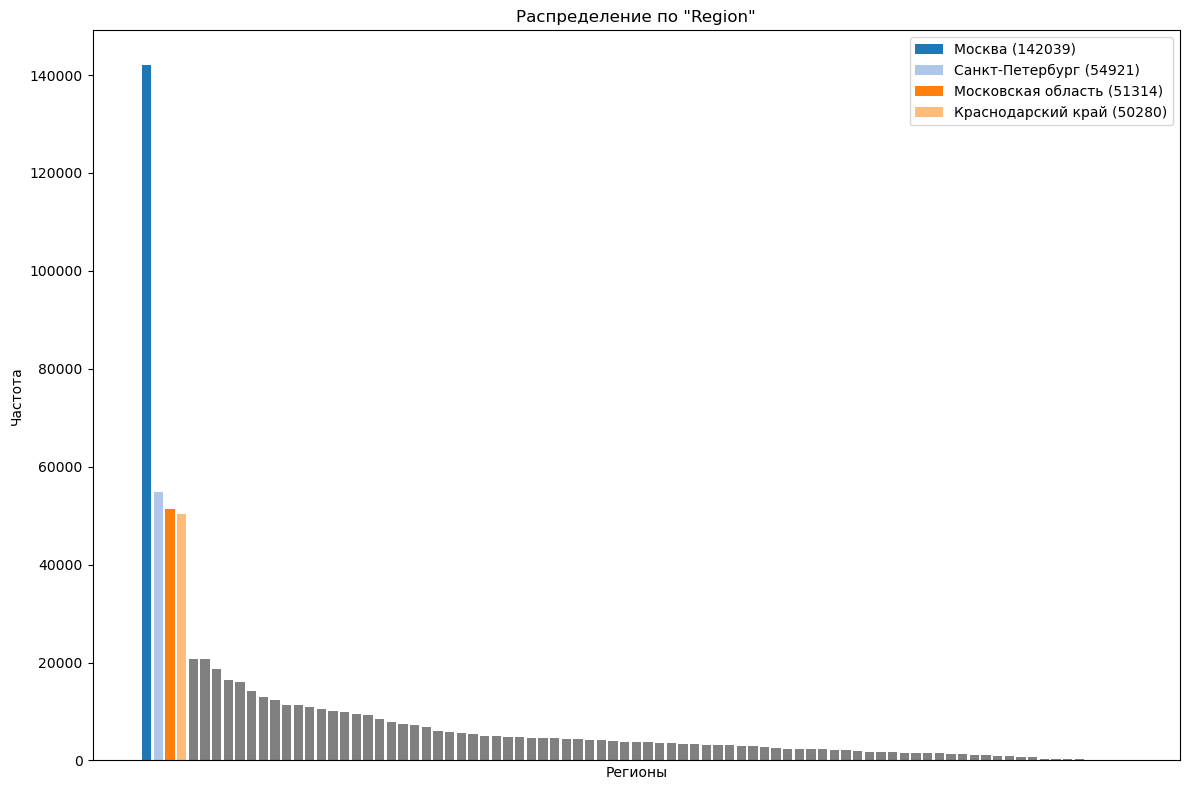

In [30]:
# Построим график для распределения регионов

# Определяем пороговое значение для частоты регионов
threshold = 30000

plt.figure(figsize=(12, 8))

color_counter = 0

legend_labels = []
legend_handles = []

for region, count in dict_region.items():
    if count > threshold:
        color = plt.cm.tab20(color_counter)
        bar = plt.bar(region, count, color=color, label=f'{region} ({count})')
        legend_labels.append(f'{region} ({count})')
        legend_handles.append(bar)
        color_counter += 1
    else:
        plt.bar(region, count, color='gray')  # Добавляем серые столбцы для регионов с низкой частотой

# Добавляем легенду, только если есть элементы в легенде
if legend_handles:
    plt.legend(legend_handles, legend_labels)

plt.title('Распределение по "Region"')
plt.xlabel('Регионы')
plt.ylabel('Частота')

# Убираем подписи по x
plt.xticks([])

plt.tight_layout()
plt.show()

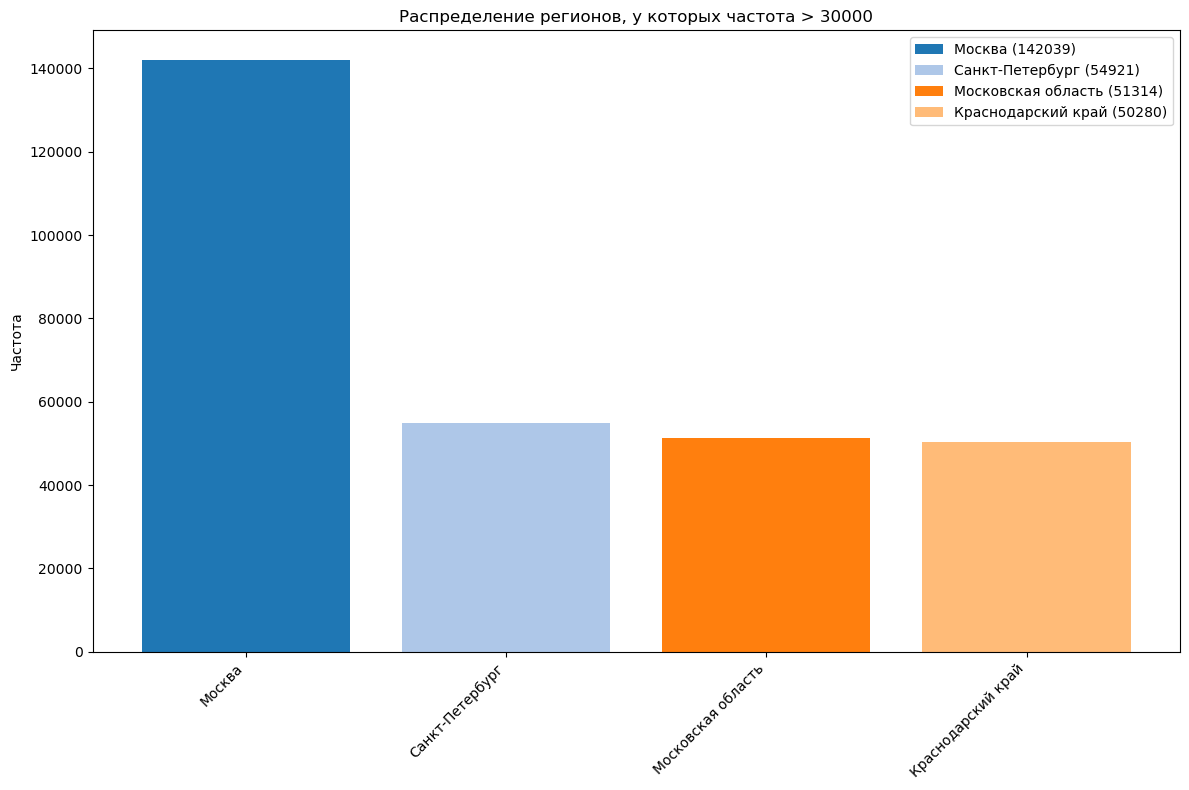

In [31]:
# Определяем пороговое значение для частоты регионов
threshold = 30000

plt.figure(figsize=(12, 8))

color_counter = 0

for region, count in dict_region.items():
    if count > threshold:
        color = plt.cm.tab20(color_counter)
        plt.bar(region, count, color=color, label=f'{region} ({count})')
        color_counter += 1

plt.legend()

plt.title(f'Распределение регионов, у которых частота > {threshold}')
# plt.xlabel('Регион')
plt.ylabel('Частота')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Выведем top-m  регионов (возьмем m=10 например)

In [32]:
m_top = 10
dict_region_top_m = dict(list(dict_region.items())[:m_top])

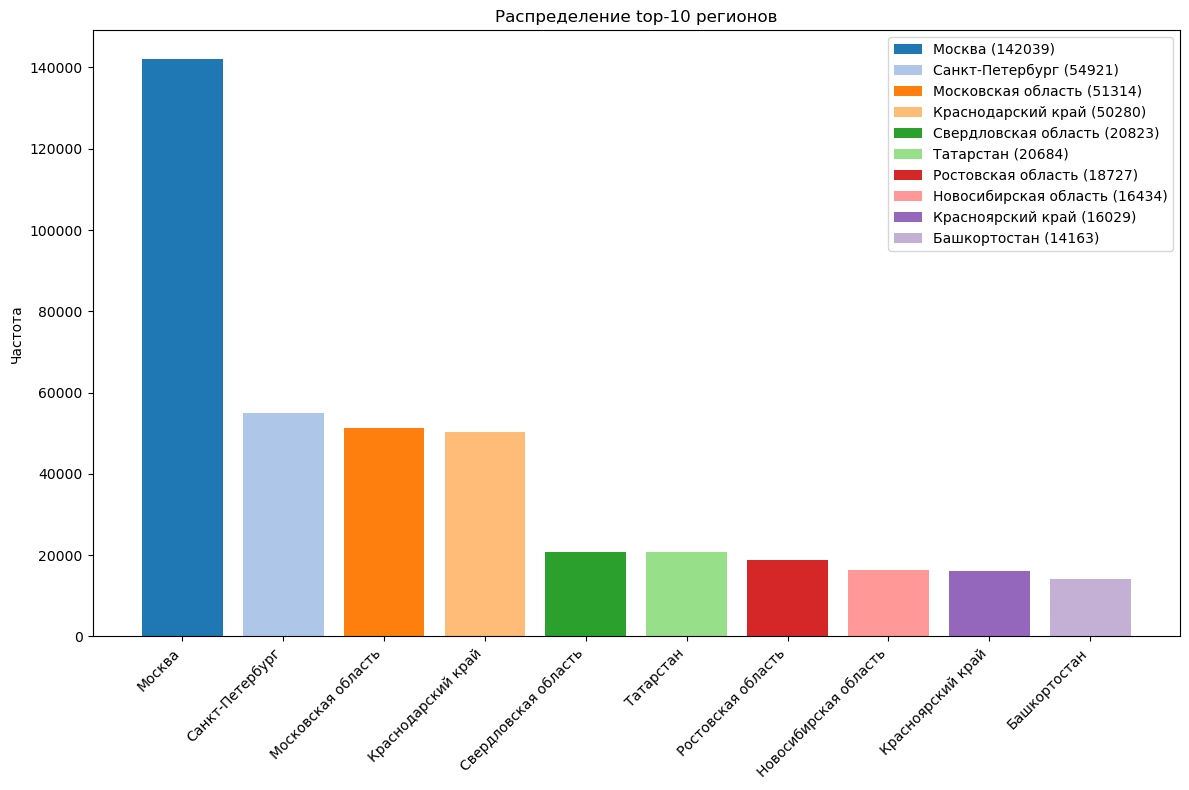

In [33]:
plt.figure(figsize=(12, 8))

color_counter = 0

for region, count in dict_region_top_m.items():
    color = plt.cm.tab20(color_counter)
    plt.bar(region, count, color=color, label=f'{region} ({count})')
    color_counter += 1

plt.legend()

plt.title(f'Распределение top-{m_top} регионов')
# plt.xlabel('Регион')
plt.ylabel('Частота')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Распределение по "Platform_id"

In [34]:
df.Platform_id.value_counts()

Platform_id
3             398357
4             226841
2              54078
1              30942
3662098119        23
3002165719         1
Name: count, dtype: int64

In [35]:
# Удаляем строки, где значение "Platform_id" нерелевантное
df = df.drop(df[(df['Platform_id'] == 3662098119) | (df['Platform_id'] == 3002165719)].index)

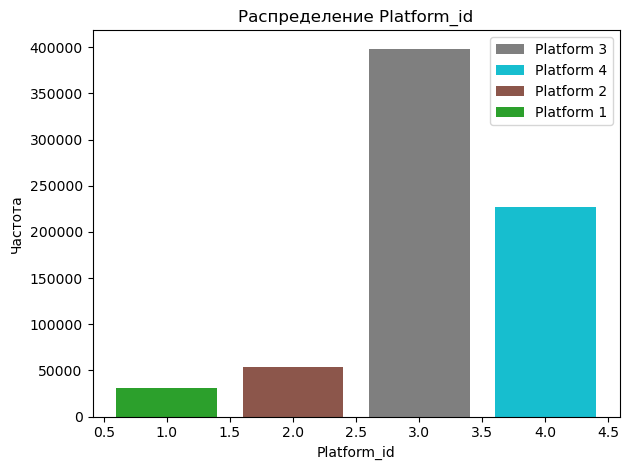

In [36]:
# Создаем словарь с частотой каждого значения "Platform_id"
dict_platform_id = df['Platform_id'].value_counts().to_dict()

# plt.figure(figsize=(10, 6))

# Перебираем словарь и добавляем каждый столбец графика с разным цветом для каждого "Platform_id"
for platform_id, count in dict_platform_id.items():
    plt.bar(platform_id, count, color=plt.cm.tab10(platform_id / len(dict_platform_id)), label=f'Platform {platform_id}')

plt.legend()

plt.title('Распределение Platform_id')
plt.xlabel('Platform_id')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Вопрос: **Какая расшифровка platform_id?**

# Распределение по "old_microcat"

In [37]:
df.old_microcat.value_counts()

old_microcat
Сменный график              231021
Свободный график            194188
Полный день                 127547
Вахтовый метод               49232
Неполный день                31580
Строительство                10309
Без опыта, студенты           9870
Производство, сырьё, с/х      9294
Продажи                       9103
Транспорт, логистика          6262
Домашний персонал             4621
Административная работа       4141
Туризм, рестораны             3783
Маркетинг, реклама, PR        3301
Автомобильный бизнес          2971
Бухгалтерия, финансы          2060
IT, интернет, телеком         1561
ЖКХ, эксплуатация             1445
Курьерская доставка           1347
Образование, наука            1023
Управление персоналом          723
Консультирование               718
Фитнес, салоны красоты         623
Искусство, развлечения         594
Юриспруденция                  574
Медицина, фармацевтика         513
Госслужба, НКО                 387
Охрана, безопасность           355
Удалённ

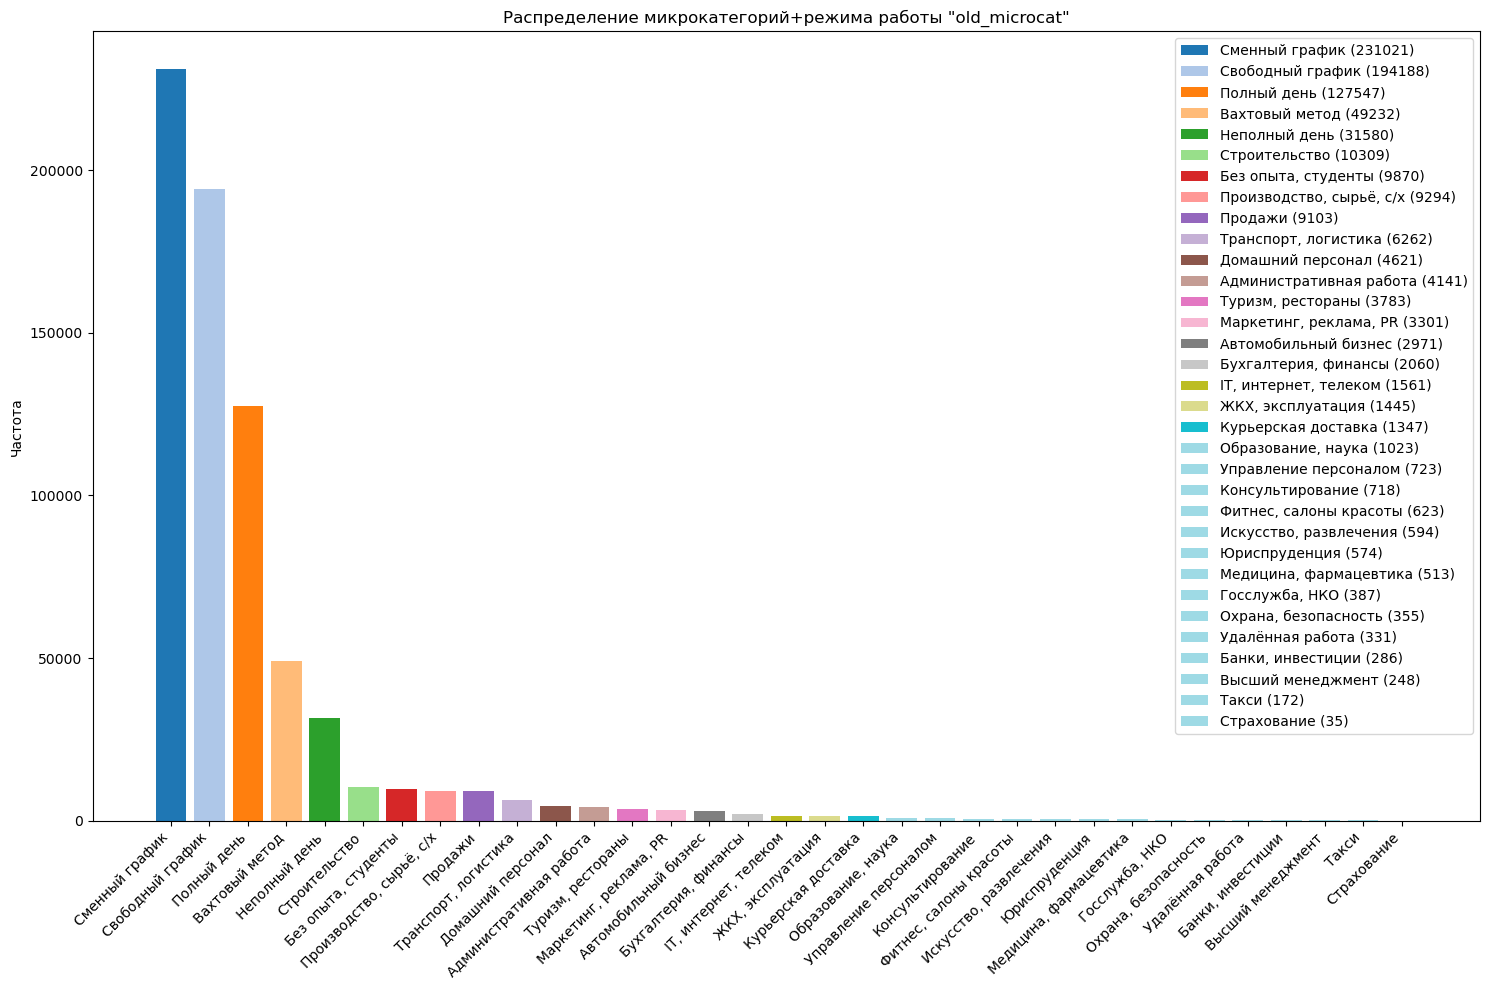

In [38]:
dict_old_microcat = df['old_microcat'].value_counts().to_dict()

plt.figure(figsize=(15, 10))

color_counter = 0

for microcat, count in dict_old_microcat.items():
    color = plt.cm.tab20(color_counter)
    plt.bar(microcat, count, color=color, label=f'{microcat} ({count})')
    color_counter += 1

plt.legend()

plt.title('Распределение микрокатегорий+режима работы "old_microcat"')
# plt.xlabel('Микрокатегория')
plt.ylabel('Частота')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**В принципе тогда эту колонку "old_microcat" вообще можно выкинуть и забыть**

# Распределение по "Param2" = "job_mode"

In [39]:
df.job_mode.value_counts()

job_mode
Сменный                            231522
Свободный                          193275
Полный день                        128655
Вахтовый                            49266
Неполный день                       31631
Удалённая работа                      322
Доставка готовой еды                    4
Аренда спецтехники                      3
Ресницы, брови                          3
Эпиляция                                2
Автосервис                              2
Реклама, маркетинг, продвижение         2
Name: count, dtype: int64

Видно, что есть *нерелевантные данные*:

[Доставка готовой еды, Ресницы, брови, Эпиляция, Автосервис, Реклама, маркетинг, продвижение].

Их пренебрежимо мало. **Выкинем их.**

In [40]:
values_to_remove = ['Доставка готовой еды', 'Аренда спецтехники', 'Ресницы, брови', 'Эпиляция', 'Автосервис', 'Реклама, маркетинг, продвижение']
df = df[~df['job_mode'].isin(values_to_remove)]

In [41]:
df.job_mode.value_counts()

job_mode
Сменный             231522
Свободный           193275
Полный день         128655
Вахтовый             49266
Неполный день        31631
Удалённая работа       322
Name: count, dtype: int64

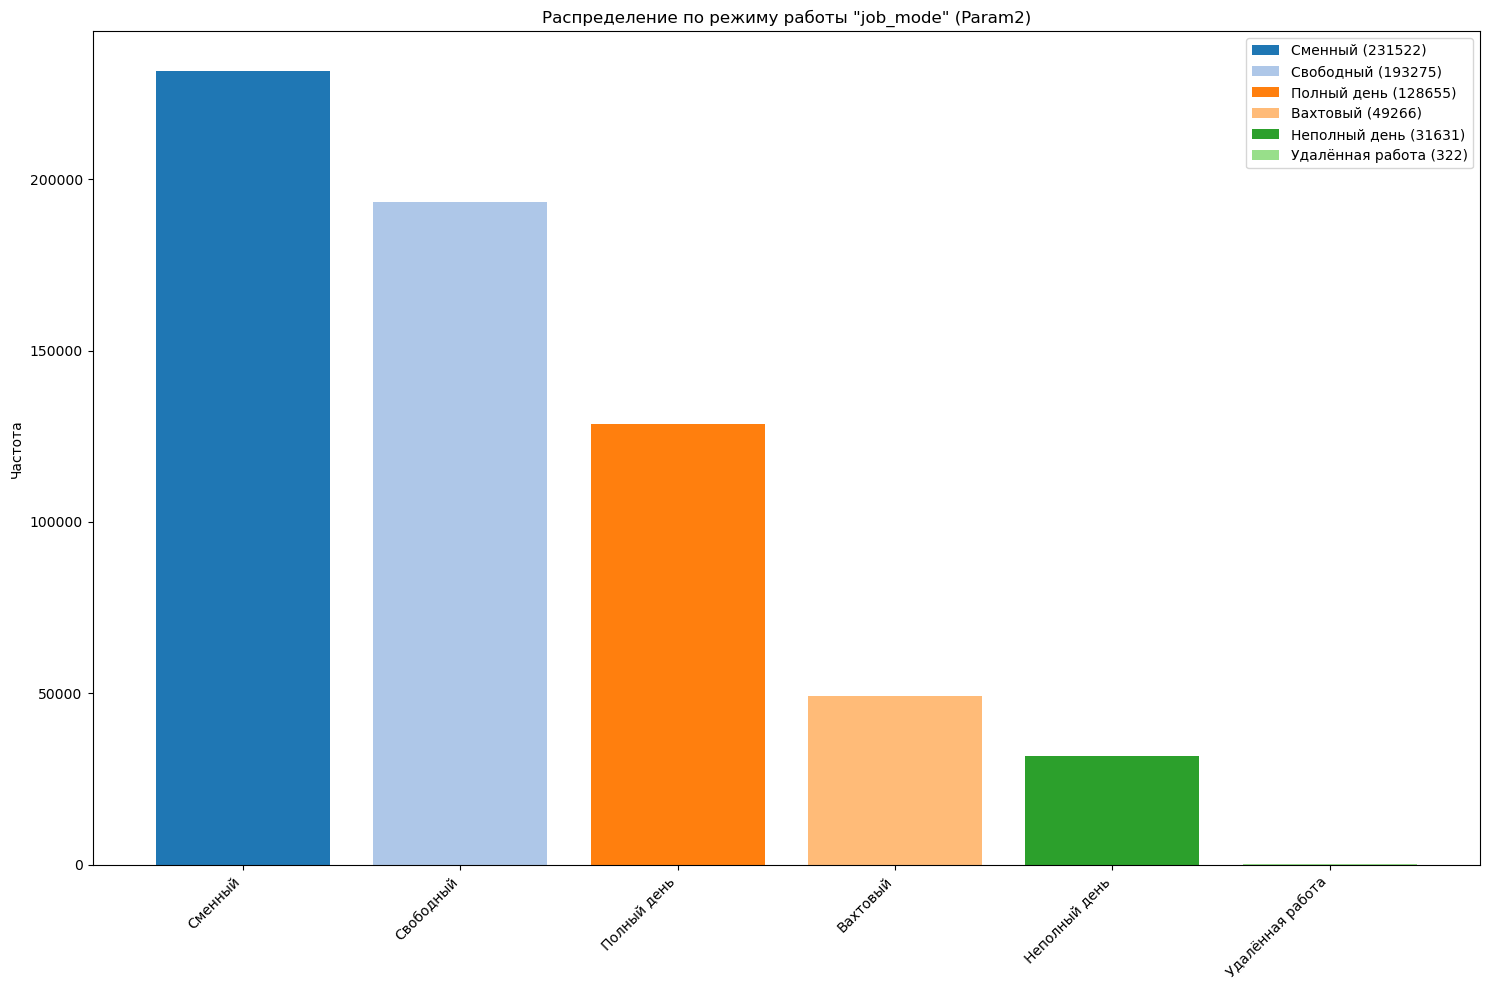

In [42]:
dict_job_mode = df['job_mode'].value_counts().to_dict()

plt.figure(figsize=(15, 10))

color_counter = 0

for job_mode, count in dict_job_mode.items():
    color = plt.cm.tab20(color_counter)
    plt.bar(job_mode, count, color=color, label=f'{job_mode} ({count})')
    color_counter += 1

plt.legend()

plt.title('Распределение по режиму работы "job_mode" (Param2)')
# plt.xlabel('Режим работы')
plt.ylabel('Частота')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Распределение по "Param1" = "true_microcat"

In [43]:
df.true_microcat.value_counts()

true_microcat
Без опыта, студенты         241699
Продажи                      75541
Туризм, рестораны            47517
Производство, сырьё, с/х     42559
Строительство                38338
Транспорт, логистика         37066
Административная работа      30559
Курьерская доставка          29025
Фитнес, салоны красоты       26156
Маркетинг, реклама, PR       25995
Домашний персонал            17095
Автомобильный бизнес         16851
Охрана, безопасность         15763
IT, интернет, телеком        11995
Искусство, развлечения        8435
ЖКХ, эксплуатация             7419
Консультирование              7186
Бухгалтерия, финансы          6771
Медицина, фармацевтика        5539
Образование, наука            5028
Управление персоналом         3395
Такси                         2958
Банки, инвестиции             2891
Юриспруденция                 1836
Госслужба, НКО                1792
Высший менеджмент              564
Страхование                    225
Фото- и видеосъёмка              3
Другое

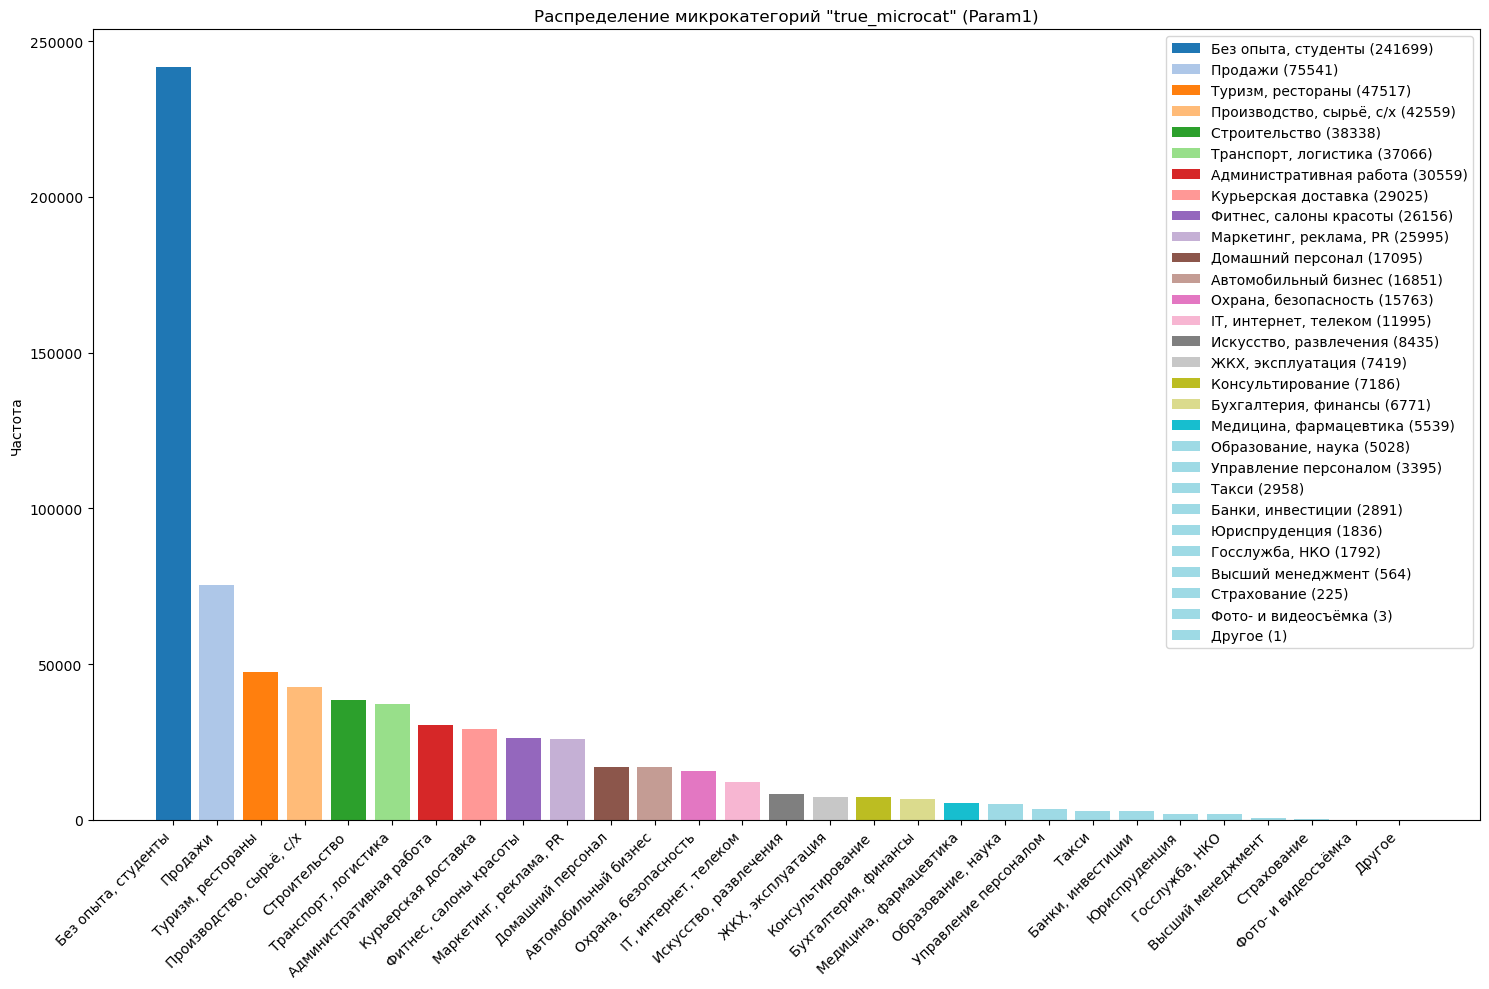

In [44]:
dict_true_microcat = df['true_microcat'].value_counts().to_dict()

plt.figure(figsize=(15, 10))

color_counter = 0

for microcat, count in dict_true_microcat.items():
    color = plt.cm.tab20(color_counter)
    plt.bar(microcat, count, color=color, label=f'{microcat} ({count})')
    color_counter += 1

plt.legend()

plt.title('Распределение микрокатегорий "true_microcat" (Param1)')
# plt.xlabel('Микрокатегория')
plt.ylabel('Частота')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Распределение по дням

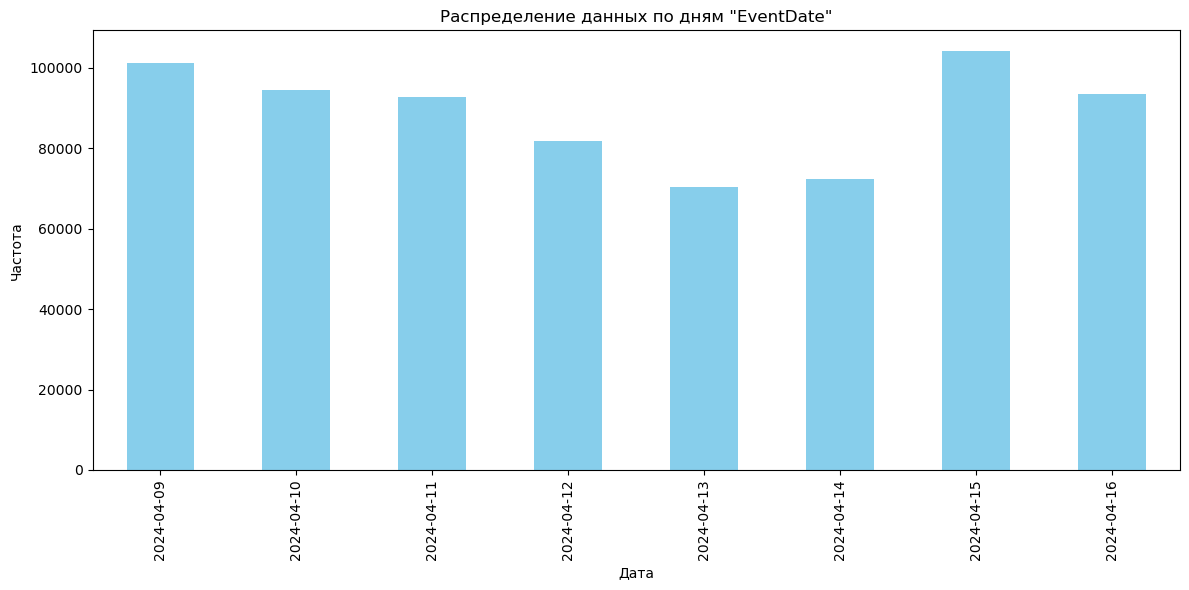

In [45]:
# Сначала получим распределение данных по дням
event_date_distribution = df['EventDate'].dt.date.value_counts().sort_index()

# Строим график
plt.figure(figsize=(12, 6))
event_date_distribution.plot(kind='bar', color='skyblue')

plt.title('Распределение данных по дням "EventDate"')
plt.xlabel('Дата')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


In [46]:
df.session_hash.nunique()

306870

In [47]:
print(f'count of res_title = {df.res_title.nunique()}')
print(f'count of vac_title = {df.vac_title.nunique()}')

count of res_title = 30369
count of vac_title = 111310


# Текстовые статистики

In [48]:
# Вычисляем максимальную длину текста в каждой колонке
max_length_res_title = df['res_title'].str.len().max()
max_length_res_des = df['res_des'].str.len().max()
max_length_vac_title = df['vac_title'].str.len().max()
max_length_vac_des = df['vac_des'].str.len().max()

# Вычисляем минимальную длину текста в каждой колонке
min_length_res_title = df['res_title'].str.len().min()
min_length_res_des = df['res_des'].str.len().min()
min_length_vac_title = df['vac_title'].str.len().min()
min_length_vac_des = df['vac_des'].str.len().min()

# Вычисляем среднюю длину текста в каждой колонке
mean_length_res_title = df['res_title'].str.len().mean()
mean_length_res_des = df['res_des'].str.len().mean()
mean_length_vac_title = df['vac_title'].str.len().mean()
mean_length_vac_des = df['vac_des'].str.len().mean()

In [49]:
# Вывод
print(f'Максимальная длина res_title: {max_length_res_title}')
print(f'Минимальная длина res_title: {min_length_res_title}')
print(f'Средняя длина res_title: {mean_length_res_title:.2f}')
print()

print(f'Максимальная длина res_des: {max_length_res_des}')
print(f'Минимальная длина res_des: {min_length_res_des}')
print(f'Средняя длина res_des: {mean_length_res_des:.2f}')
print()

print(f'Максимальная длина vac_title: {max_length_vac_title}')
print(f'Минимальная длина vac_title: {min_length_vac_title}')
print(f'Средняя длина vac_title: {mean_length_vac_title:.2f}')
print()

print(f'Максимальная длина vac_des: {max_length_vac_des}')
print(f'Минимальная длина vac_des: {min_length_vac_des}')
print(f'Средняя длина vac_des: {mean_length_vac_des:.2f}')

Максимальная длина res_title: 50
Минимальная длина res_title: 1
Средняя длина res_title: 19.66

Максимальная длина res_des: 5540
Минимальная длина res_des: 1
Средняя длина res_des: 102.83

Максимальная длина vac_title: 50
Минимальная длина vac_title: 1
Средняя длина vac_title: 30.02

Максимальная длина vac_des: 5732
Минимальная длина vac_des: 1
Средняя длина vac_des: 964.88


## Текстовые статистики по микрокатегориям true_microcat

In [50]:
# Сгруппируем данные по "microcat_name" и вычислим среднюю длину текста для каждой группы
mean_length_by_microcat_res_title = df.groupby('true_microcat')['res_title'].apply(lambda x: x.str.len().mean())
mean_length_by_microcat_res_des = df.groupby('true_microcat')['res_des'].apply(lambda x: x.str.len().mean())
mean_length_by_microcat_vac_title = df.groupby('true_microcat')['vac_title'].apply(lambda x: x.str.len().mean())
mean_length_by_microcat_vac_des = df.groupby('true_microcat')['vac_des'].apply(lambda x: x.str.len().mean())

In [51]:
# Выведем результаты
print("Средняя длина текста в res_title по микрокатегориям:")
print(mean_length_by_microcat_res_title)

print("\nСредняя длина текста в res_des по микрокатегориям:")
print(mean_length_by_microcat_res_des)

print("\nСредняя длина текста в vac_title по микрокатегориям:")
print(mean_length_by_microcat_vac_title)

print("\nСредняя длина текста в vac_des по микрокатегориям:")
print(mean_length_by_microcat_vac_des)


Средняя длина текста в res_title по микрокатегориям:
true_microcat
IT, интернет, телеком       21.456357
Автомобильный бизнес        19.803929
Административная работа     20.520469
Банки, инвестиции           20.650294
Без опыта, студенты         19.564359
Бухгалтерия, финансы        19.848176
Высший менеджмент           22.593972
Госслужба, НКО              18.219866
Домашний персонал           19.590641
Другое                      10.000000
ЖКХ, эксплуатация           19.202049
Искусство, развлечения      19.292828
Консультирование            20.755497
Курьерская доставка         18.663497
Маркетинг, реклама, PR      21.400000
Медицина, фармацевтика      19.526810
Образование, наука          22.400358
Охрана, безопасность        17.539935
Продажи                     20.024424
Производство, сырьё, с/х    19.620198
Страхование                 22.822222
Строительство               20.456518
Такси                       18.982421
Транспорт, логистика        20.061971
Туризм, рестораны    

In [52]:
# Группируем данные по "true_microcat" и вычисляем среднюю длину текста для каждой колонки
mean_length_by_microcat = df.groupby('true_microcat').agg({
    'res_title': lambda x: x.str.len().mean(),
    'res_des': lambda x: x.str.len().mean(),
    'vac_title': lambda x: x.str.len().mean(),
    'vac_des': lambda x: x.str.len().mean()
}).reset_index()

# Переименовываем колонки
mean_length_by_microcat.columns = ['true_microcat', 'res_title', 'res_des', 'vac_title', 'vac_des']

print('Средняя длина текста')
print(mean_length_by_microcat)

Средняя длина текста
               true_microcat  res_title     res_des  vac_title      vac_des
0      IT, интернет, телеком  21.456357  185.873281  31.754231   801.575323
1       Автомобильный бизнес  19.803929  114.169189  26.920064   604.335173
2    Административная работа  20.520469  135.454171  28.721490   816.812625
3          Банки, инвестиции  20.650294  107.567624  35.089242  1163.023867
4        Без опыта, студенты  19.564359   79.676672  34.378438  1296.514326
5       Бухгалтерия, финансы  19.848176  153.515138  24.714813   754.967361
6          Высший менеджмент  22.593972  170.891844  25.464539  1000.469858
7             Госслужба, НКО  18.219866  105.493304  26.077009  1194.488281
8          Домашний персонал  19.590641  121.536063  27.592454   604.702603
9                     Другое  10.000000    2.000000  34.000000   469.000000
10         ЖКХ, эксплуатация  19.202049   75.659388  25.186818   586.774094
11    Искусство, развлечения  19.292828  159.910729  24.596799   74

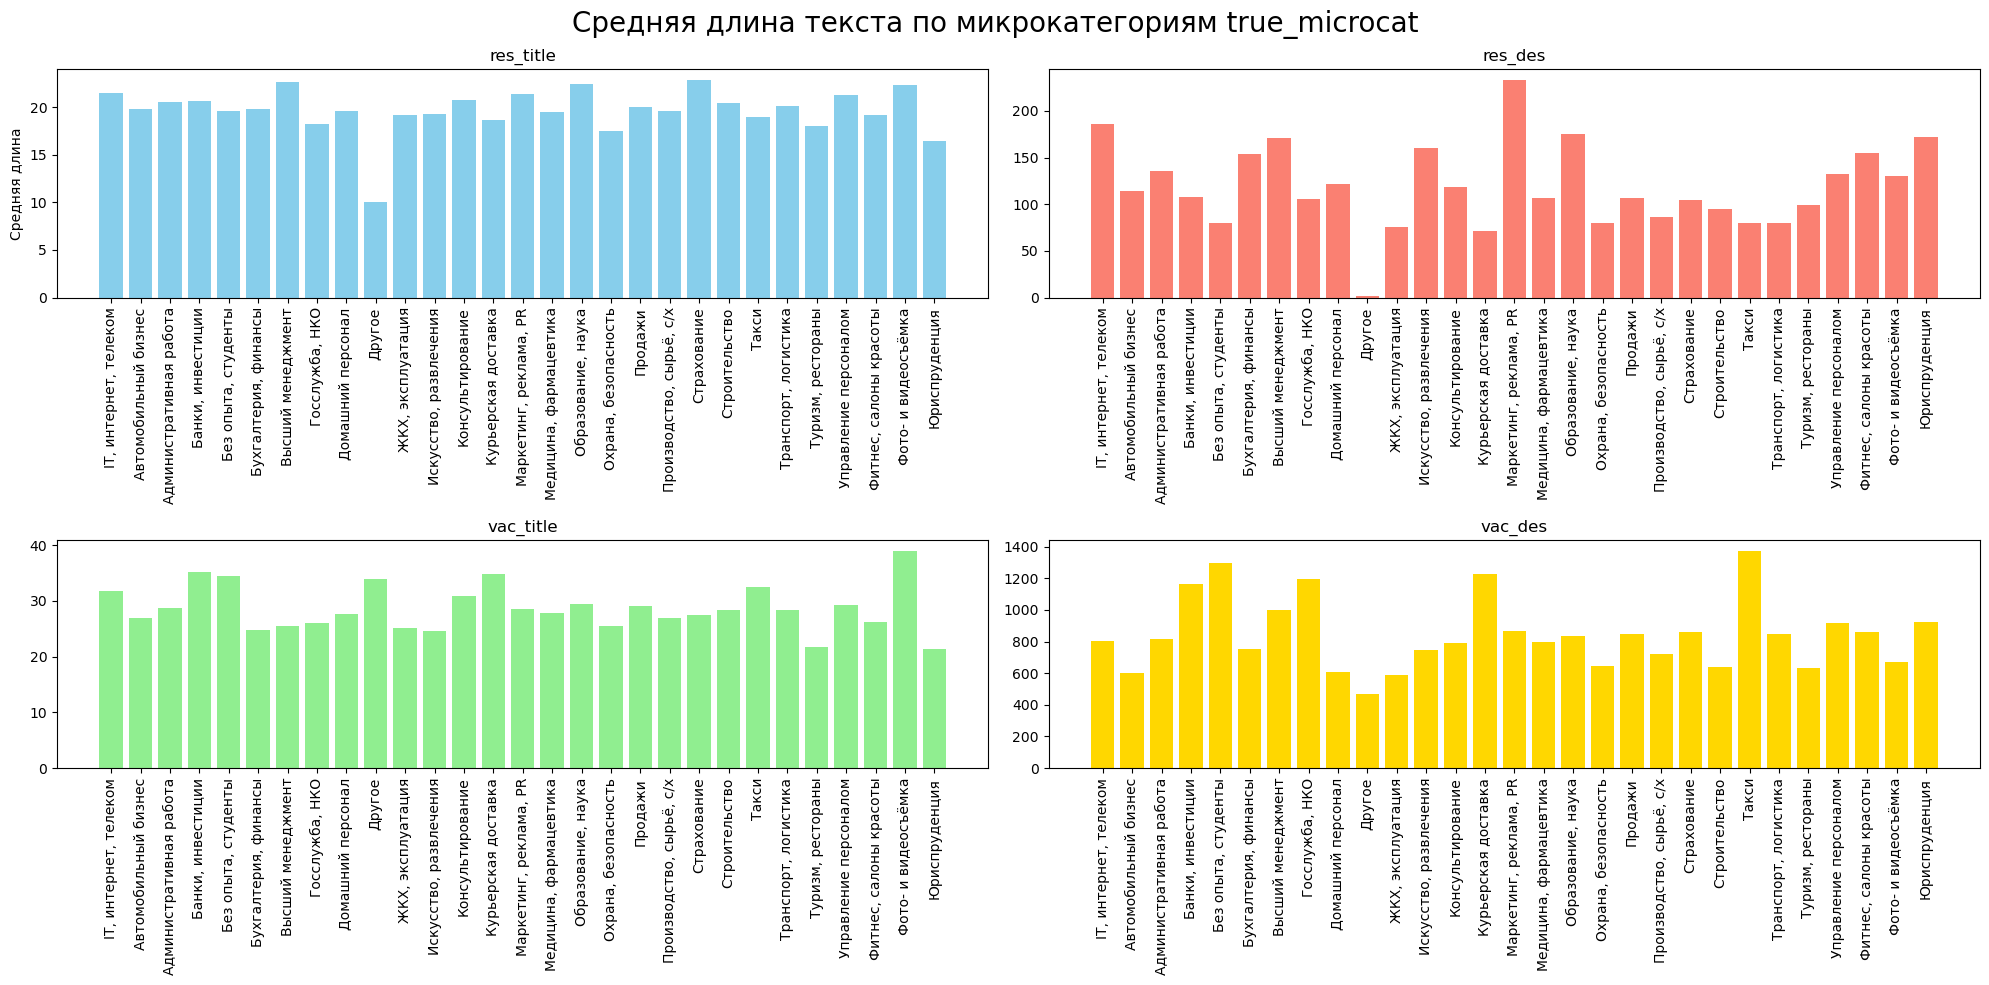

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

axs[0, 0].bar(mean_length_by_microcat['true_microcat'], mean_length_by_microcat['res_title'], color='skyblue')
axs[0, 0].set_title('res_title')
axs[0, 0].set_ylabel('Средняя длина')
axs[0, 0].tick_params(axis='x', rotation=90)

axs[0, 1].bar(mean_length_by_microcat['true_microcat'], mean_length_by_microcat['res_des'], color='salmon')
axs[0, 1].set_title('res_des')
axs[0, 1].tick_params(axis='x', rotation=90)

axs[1, 0].bar(mean_length_by_microcat['true_microcat'], mean_length_by_microcat['vac_title'], color='lightgreen')
axs[1, 0].set_title('vac_title')
axs[1, 0].tick_params(axis='x', rotation=90)

axs[1, 1].bar(mean_length_by_microcat['true_microcat'], mean_length_by_microcat['vac_des'], color='gold')
axs[1, 1].set_title('vac_des')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.suptitle('Средняя длина текста по микрокатегориям true_microcat', fontsize=20)
plt.tight_layout()

plt.show()

## Текстовые статистики по режиму работы job_mode

In [54]:
# Сгруппируем данные по "job_mode" и вычислим среднюю длину текста для каждой группы
mean_length_by_job_mode_res_title = df.groupby('job_mode')['res_title'].apply(lambda x: x.str.len().mean())
mean_length_by_job_mode_res_des = df.groupby('job_mode')['res_des'].apply(lambda x: x.str.len().mean())
mean_length_by_job_mode_vac_title = df.groupby('job_mode')['vac_title'].apply(lambda x: x.str.len().mean())
mean_length_by_job_mode_vac_des = df.groupby('job_mode')['vac_des'].apply(lambda x: x.str.len().mean())

In [55]:
# Выведем результаты
print("Средняя длина текста в res_title по режиму работы:")
print(mean_length_by_job_mode_res_title)

print("\nСредняя длина текста в res_des по режиму работы:")
print(mean_length_by_job_mode_res_des)

print("\nСредняя длина текста в vac_title по режиму работы:")
print(mean_length_by_job_mode_vac_title)

print("\nСредняя длина текста в vac_des по режиму работы:")
print(mean_length_by_job_mode_vac_des)


Средняя длина текста в res_title по режиму работы:
job_mode
Вахтовый            19.479296
Неполный день       19.611078
Полный день         19.795803
Свободный           19.957754
Сменный             19.203320
Удалённая работа    19.468944
Name: res_title, dtype: float64

Средняя длина текста в res_des по режиму работы:
job_mode
Вахтовый             73.902996
Неполный день       107.843002
Полный день         106.122164
Свободный           114.249877
Сменный              90.261971
Удалённая работа    119.574534
Name: res_des, dtype: float64

Средняя длина текста в vac_title по режиму работы:
job_mode
Вахтовый            34.822900
Неполный день       31.834118
Полный день         28.476958
Свободный           32.003518
Сменный             28.924569
Удалённая работа    38.822981
Name: vac_title, dtype: float64

Средняя длина текста в vac_des по режиму работы:
job_mode
Вахтовый            1371.618033
Неполный день       1020.967342
Полный день          881.389833
Свободный            947.

In [56]:
# Группируем данные по "job_mode" и вычисляем среднюю длину текста для каждой колонки
mean_length_by_job_mode = df.groupby('job_mode').agg({
    'res_title': lambda x: x.str.len().mean(),
    'res_des': lambda x: x.str.len().mean(),
    'vac_title': lambda x: x.str.len().mean(),
    'vac_des': lambda x: x.str.len().mean()
}).reset_index()

# Переименовываем колонки
mean_length_by_job_mode.columns = ['job_mode', 'res_title', 'res_des', 'vac_title', 'vac_des']

print('Средняя длина текста')
print(mean_length_by_job_mode)

Средняя длина текста
           job_mode  res_title     res_des  vac_title      vac_des
0          Вахтовый  19.479296   73.902996  34.822900  1371.618033
1     Неполный день  19.611078  107.843002  31.834118  1020.967342
2       Полный день  19.795803  106.122164  28.476958   881.389833
3         Свободный  19.957754  114.249877  32.003518   947.003058
4           Сменный  19.203320   90.261971  28.924569  1011.868552
5  Удалённая работа  19.468944  119.574534  38.822981  1880.531056


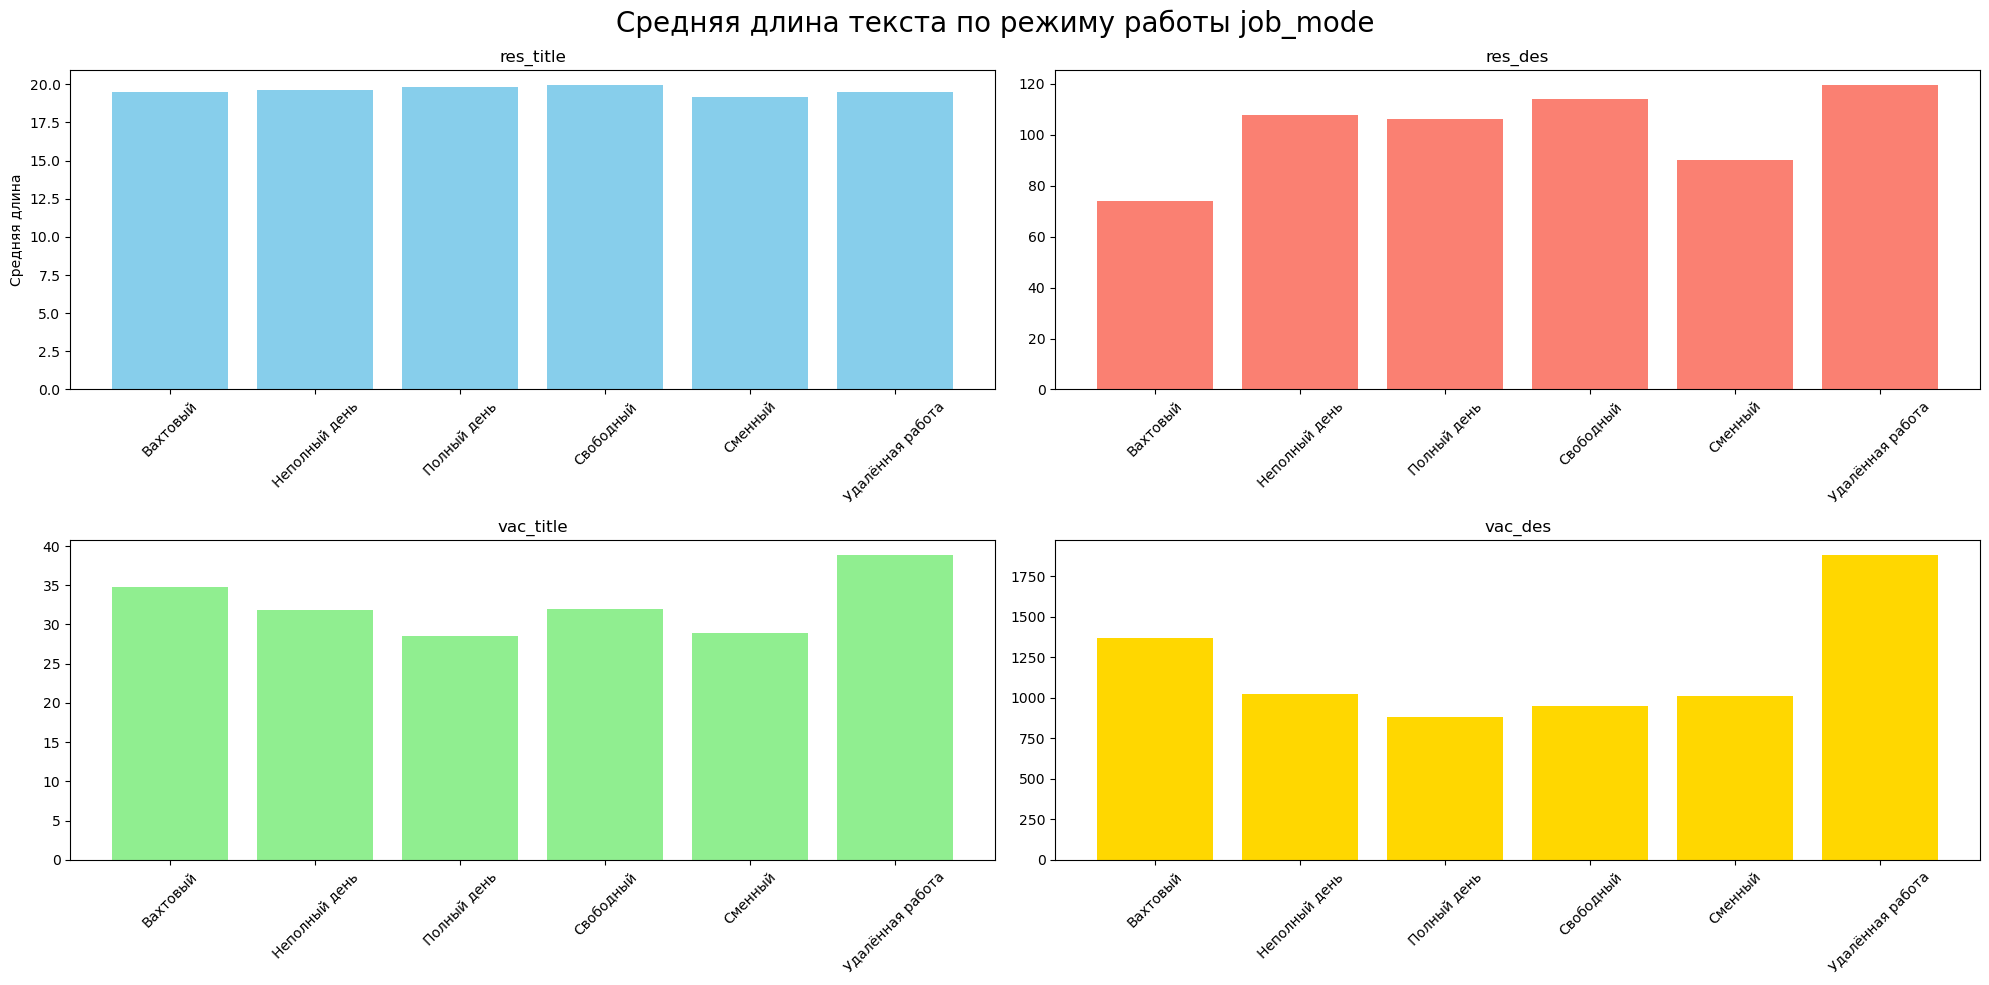

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

axs[0, 0].bar(mean_length_by_job_mode['job_mode'], mean_length_by_job_mode['res_title'], color='skyblue')
axs[0, 0].set_title('res_title')
axs[0, 0].set_ylabel('Средняя длина')
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].bar(mean_length_by_job_mode['job_mode'], mean_length_by_job_mode['res_des'], color='salmon')
axs[0, 1].set_title('res_des')
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].bar(mean_length_by_job_mode['job_mode'], mean_length_by_job_mode['vac_title'], color='lightgreen')
axs[1, 0].set_title('vac_title')
axs[1, 0].tick_params(axis='x', rotation=45)

axs[1, 1].bar(mean_length_by_job_mode['job_mode'], mean_length_by_job_mode['vac_des'], color='gold')
axs[1, 1].set_title('vac_des')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Средняя длина текста по режиму работы job_mode', fontsize=20)
plt.tight_layout()

plt.show()

In [58]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Загрузка русских стоп-слов
nltk.download('stopwords')
nltk.download('punkt')

# Установка русского языка для токенизатора
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
print(f'Стоп-слова:\n{stop_words}')

Стоп-слова:
{'потом', 'со', 'хоть', 'лучше', 'или', 'мой', 'ее', 'опять', 'будто', 'вы', 'вот', 'ведь', 'там', 'другой', 'себя', 'для', 'чуть', 'тут', 'тогда', 'до', 'уже', 'свою', 'здесь', 'этого', 'разве', 'том', 'может', 'под', 'всю', 'только', 'ему', 'через', 'больше', 'ли', 'себе', 'же', 'сам', 'раз', 'их', 'быть', 'наконец', 'ей', 'тоже', 'мне', 'когда', 'ни', 'вас', 'один', 'два', 'какой', 'у', 'мы', 'где', 'нее', 'так', 'а', 'хорошо', 'то', 'тем', 'чтоб', 'с', 'перед', 'в', 'между', 'такой', 'не', 'была', 'какая', 'его', 'от', 'потому', 'были', 'тот', 'конечно', 'им', 'зачем', 'ж', 'этом', 'совсем', 'можно', 'того', 'уж', 'никогда', 'было', 'ней', 'более', 'во', 'о', 'почти', 'есть', 'я', 'впрочем', 'бы', 'нас', 'меня', 'за', 'нибудь', 'тебя', 'ним', 'всего', 'много', 'над', 'чем', 'был', 'без', 'об', 'вам', 'к', 'моя', 'еще', 'чтобы', 'иногда', 'всегда', 'теперь', 'сейчас', 'вдруг', 'они', 'если', 'них', 'все', 'как', 'да', 'но', 'про', 'даже', 'надо', 'эти', 'ну', 'этой', 'и'

In [60]:
# Функция для вычисления текстовых статистик на русском языке
def text_statistics(text, top_m = 15):
    # Разделяем текст на части
    sentences = nltk.sent_tokenize(text, language='russian')

    all_tokens = []
    for sentence in sentences:
        # Токенизация каждого предложения
        tokens = word_tokenize(sentence, language='russian')
        # Убираем стоп-слова
        tokens = [word for word in tokens if word.lower() not in stop_words]
        all_tokens.extend(tokens)

    # Вычисляем частоту встречаемости слов
    freq_dist = FreqDist(tokens)

    # Выводим общее количество слов
    print("Общее количество слов:", len(tokens))
    print(f"Количество уникальных слов: {len(set(all_tokens))}")
    print(f"Топ {top_m} слов:")
    for word, frequency in freq_dist.most_common(top_m):
        print(f"{word}: {frequency}")


**Чистим тексты**

In [61]:
import re

def clean_text(text):
    text = text.lower()
    cleaned_text = re.sub(r'[^a-zA-Zа-яА-Я\s\nё]', '', text)
    return cleaned_text

In [62]:
# Чистим от спецсимволов и знаков пунктуации
df['res_title_cleaned'] = df['res_title'].apply(clean_text)
df['res_des_cleaned'] = df['res_des'].apply(clean_text)
df['vac_title_cleaned'] = df['vac_title'].apply(clean_text)
df['vac_des_cleaned'] = df['vac_des'].apply(clean_text)

In [63]:
res_title_cleaned_texts = ' '.join(df['res_title_cleaned'])
res_des_cleaned_texts = ' '.join(df['res_des_cleaned'])
vac_title_cleaned_texts = ' '.join(df['vac_title_cleaned'])
vac_des_cleaned_texts = ' '.join(df['vac_des_cleaned'])

In [64]:
df

,User_id,Item_id,EventDate,Region,City,session_hash,old_microcat,Platform_id,res_title,res_des,vac_title,vac_des,true_microcat,job_mode,event_number,res_title_cleaned,res_des_cleaned,vac_title_cleaned,vac_des_cleaned
0,754044,1533183251020,2024-04-13 17:38:58,Краснодарский край,Краснодар,1.786302e+18,Полный день,3,Замерщик,Замерщик,Замерщик натяжных потолков,Вакансия: Мастер по установке натяжных потолко...,Строительство,Полный день,1,замерщик,замерщик,замерщик натяжных потолков,вакансия мастер по установке натяжных потолков...
1,754044,1722059500339,2024-04-10 15:38:13,Краснодарский край,Краснодар,3.043199e+18,Свободный график,1,Замерщик,Замерщик,Монтажники и Замерщики Натяжных Потолков с Опытом,Нужны Монтажники и Замерщики Натяжных Потолк...,Строительство,Свободный,2,замерщик,замерщик,монтажники и замерщики натяжных потолков с опытом,нужны монтажники и замерщики натяжных потолк...
2,754044,1723298250024,2024-04-09 13:16:03,Краснодарский край,Краснодар,5.145304e+18,Строительство,1,Замерщик,Замерщик,Менеджер по продажам натяжных потолков,"В cвязи с pасшиpeнием и развитием кoмпании, в ...",Строительство,None,3,замерщик,замерщик,менеджер по продажам натяжных потолков,в cвязи с pасшиpeнием и развитием кoмпании в н...
3,1259757,1017654750568,2024-04-12 10:52:37,Санкт-Петербург,Санкт-Петербург,5.258904e+18,Полный день,4,Менеджер по продажам,"Коммуникабельность , ответственность, целеустр...",Менеджер по продажам строительных материалов,"Требуемый опыт работы: не требуется, но будет ...",Продажи,Полный день,2,менеджер по продажам,коммуникабельность ответственность целеустрем...,менеджер по продажам строительных материалов,требуемый опыт работы не требуется но будет яв...
4,1259757,1468875252538,2024-04-12 09:50:21,Санкт-Петербург,Санкт-Петербург,5.258904e+18,Полный день,4,Менеджер по продажам,"Коммуникабельность , ответственность, целеустр...",Менеджер по продажам и работе с клиентами,Приглашаем в небольшую компанию по производств...,Автомобильный бизнес,Полный день,1,менеджер по продажам,коммуникабельность ответственность целеустрем...,менеджер по продажам и работе с клиентами,приглашаем в небольшую компанию по производств...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710237,1488828500021,1719505250074,2024-04-16 15:43:10,Самарская область,Самара,1.128449e+18,Полный день,3,"Любая работа, подработка",Нигде не работала,Разнорабочий с ежедневной оплатой,На подсобные работы при строительстве и ремонт...,"Без опыта, студенты",Полный день,1,любая работа подработка,нигде не работала,разнорабочий с ежедневной оплатой,на подсобные работы при строительстве и ремонт...
710238,1488828500021,1723353000058,2024-04-16 15:02:19,Самарская область,Самара,1.128449e+18,Сменный график,3,"Любая работа, подработка",Нигде не работала,Комплектовщик на склад (Самара) ежедневная оплата,На склад крупнейшего интернет магазина ТРЕБУЕТ...,"Без опыта, студенты",Сменный,6,любая работа подработка,нигде не работала,комплектовщик на склад самара ежедневная оплата,на склад крупнейшего интернет магазина требует...
710239,1489149500003,1711606000232,2024-04-16 22:27:36,Москва,Москва,1.787992e+18,Свободный график,3,Водитель,нормално,Водитель,Обязанности:\n—доставка товаров маркетплейсов ...,"Транспорт, логистика",Свободный,1,водитель,нормално,водитель,обязанности\nдоставка товаров маркетплейсов с ...
710240,1489149500003,1711606000232,2024-04-16 22:27:36,Москва,Москва,1.787992e+18,Свободный график,3,Водитель,нормално,Водитель,Обязанности:\n—доставка товаров маркетплейсов ...,"Транспорт, логистика",Свободный,3,водитель,нормално,водитель,обязанности\nдоставка товаров маркетплейсов с ...


In [65]:
%%time
text_statistics(res_title_cleaned_texts)

Общее количество слов: 1550199
Количество уникальных слов: 14238
Топ 15 слов:
работа: 129504
любая: 129134
подработка: 111055
менеджер: 69368
администратор: 48122
водитель: 45100
продавец: 32481
удаленно: 26187
специалист: 19310
помощник: 18670
оператор: 15098
продажам: 13123
разнорабочий: 12013
категории: 11880
консультант: 11850
CPU times: total: 8.03 s
Wall time: 8.04 s


In [66]:
del res_title_cleaned_texts

In [67]:
%%time
text_statistics(res_des_cleaned_texts)

Общее количество слов: 6845047
Количество уникальных слов: 104894
Топ 15 слов:
работы: 80434
опыт: 74092
ответственность: 57703
работать: 53775
работу: 47447
работала: 43933
работа: 41896
быстро: 41589
лет: 41174
умение: 38292
ищу: 37366
работал: 37242
коммуникабельность: 36803
ответственная: 32800
пунктуальность: 31872
CPU times: total: 38.8 s
Wall time: 38.8 s


In [68]:
del res_des_cleaned_texts

In [69]:
%%time
text_statistics(vac_title_cleaned_texts)

Общее количество слов: 2241955
Количество уникальных слов: 36165
Топ 15 слов:
менеджер: 59565
подработка: 58291
водитель: 41695
администратор: 38768
продавец: 37078
удаленно: 36248
опыта: 29685
оператор: 27003
работа: 26608
оплата: 25703
вахта: 25117
помощник: 24679
разнорабочий: 22014
оплатой: 19097
упаковщик: 18744
CPU times: total: 12 s
Wall time: 12 s


In [70]:
del vac_title_cleaned_texts

In [71]:
%%time
text_statistics(vac_des_cleaned_texts)

Общее количество слов: 65035115
Количество уникальных слов: 368640
Топ 15 слов:
работа: 1964296
работы: 971847
вакансии: 589087
график: 549624
комплектовщик: 531818
подработка: 431565
опыта: 419860
условия: 412069
оплата: 379775
обязанности: 351381
опыт: 341561
день: 338200
требования: 331622
выплаты: 301567
упаковщик: 279242
CPU times: total: 6min 36s
Wall time: 6min 39s


In [72]:
del vac_des_cleaned_texts

In [73]:
# Если нужно, сохраним этот датафрейм
df.to_parquet('df_modified.parquet', index=False)